## Recommendation system for businesses

## Recommendation System - Part I

#### Importing libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

plt.style.use('ggplot')


#### Loading the dataset

In [34]:
import pandas as pd
beauty_ratings_data = pd.read_csv('ratings_Beauty.csv').dropna()
print(beauty_ratings_data.head())

           UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200


In [36]:
# Retrieve dimensions of the DataFrame
ratings_dimensions = amazon_ratings.shape
# Display DataFrame dimensions
print(f"Dimensions: Rows={ratings_dimensions[0]}, Columns={ratings_dimensions[1]}")


Dimensions: Rows=2023070, Columns=4


In [37]:
# Combine groupby, sort, and head operations in a single chain
top_rated_products = (
    amazon_ratings.groupby('ProductId')['Rating']
    .count()
    .reset_index(name='Counts')
    .sort_values(by='Counts', ascending=False)
    .head(10)
)
print(top_rated_products)


         ProductId  Counts
65766   B001MA0QY2    7533
10516   B0009V1YR8    2869
110873  B0043OYFKU    2477
2365    B0000YUXI0    2143
105018  B003V265QW    2088
41474   B000ZMBSPE    2041
94769   B003BQ6QXK    1918
124659  B004OHQR1Q    1885
43368   B00121UVU0    1838
17629   B000FS05VG    1589


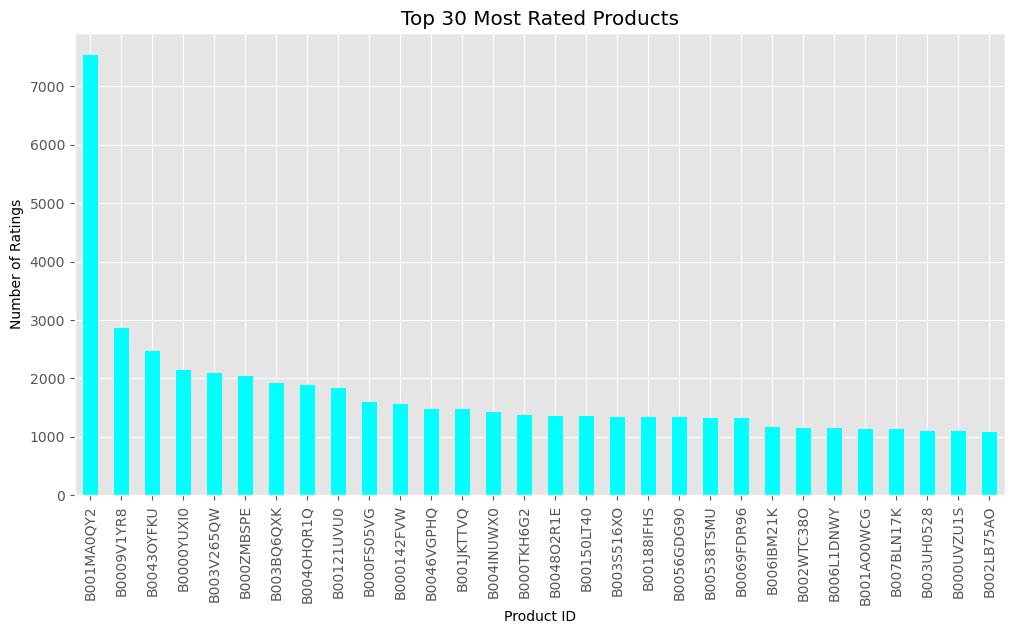

In [181]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculating the count of ratings per product and sorting them
top_rated_products = amazon_ratings.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head(30)

# Plotting the top 30 most rated products with a specific color
top_rated_products.plot(kind="bar", figsize=(12, 6), color='cyan')  # Changed color to 'cyan'
plt.title("Top 30 Most Rated Products")
plt.ylabel("Number of Ratings")
plt.xlabel("Product ID")
plt.show()
# The above graph gives us the most popular products (arranged in descending order) sold by the business.

# For example, product ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8, has sales of 3000, etc.


## Recommendation System - Part II

### Item Recommendation System Based on Collaborative Filtering

Suggest products to customers by analyzing their buying patterns and comparing them with the preferences of other customers who have purchased similar items, focusing on the similarities in the ratings they've given.

#### Utility Matrix based on products sold and user reviews

In [149]:
subset_amazon_ratings = amazon_ratings.iloc[:10000]


In [150]:
# Creating a pivot table for user-product rating matrix
user_product_rating_matrix = amazon_ratings1.pivot(index='UserId', columns='ProductId', values='Rating').fillna(0)
# Displaying the top entries in the matrix
user_product_rating_matrix.head()


ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
# Determine dimensions of the ratings utility matrix
matrix_dimensions = ratings_utility_matrix.shape
print(f"Matrix Shape: Rows={matrix_dimensions[0]}, Columns={matrix_dimensions[1]}")


Matrix Shape: Rows=9697, Columns=886


Transposing the matrix

In [152]:
# Transpose the utility matrix
transpose_matrix = ratings_utility_matrix.transpose()
# Display initial entries of the transposed matrix
transpose_matrix.head()


UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
# Retrieve and print the dimensions of the transposed matrix
transposed_dimensions = X.shape
print(f"Transposed Matrix Shape: Rows={transposed_dimensions[0]}, Columns={transposed_dimensions[1]}")


Transposed Matrix Shape: Rows=886, Columns=9697


Unique products in subset of data

In [154]:
X1 = X

### Decomposing the Matrix

In [155]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### Correlation Matrix

In [156]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

### Isolating Product ID # 6117036094 from the Correlation Matrix

Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [157]:
X.index[99]

'6117036094'

Index # of product ID purchased by customer

In [158]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [159]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### Recommending top 10 highly correlated products in sequence

In [163]:
# Format the recommendations with a prefix and enumerate them
formatted_recommendations = [f"item {index + 1}: {item}" for index, item in enumerate(recommendations)]

# Join the formatted recommendations into a single string for display
formatted_list = '\n'.join(formatted_recommendations)
print(formatted_list)


item 1: 0558925278
item 2: 1304139220
item 3: 130414089X
item 4: 130414674X
item 5: 1304174778
item 6: 1304196046
item 7: 1304196062
item 8: 1304196070
item 9: 1304196135


 top 10 product recommendations for the customer, derived from the purchasing patterns of other shoppers on the website.

## Recommendation System - Part III

For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [22]:
# Necessary library imports for text analysis and machine learning

# For text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# For finding nearest neighbors
from sklearn.neighbors import NearestNeighbors

# For clustering data
from sklearn.cluster import KMeans

# For evaluating clustering performance
from sklearn.metrics import adjusted_rand_score


In [164]:
import pandas as pd

# Load product descriptions from a CSV file
descriptions_of_products = pd.read_csv('amazon.csv')

# Retrieve and display the dimensions of the loaded DataFrame
dimensions = descriptions_of_products.shape
print(f"DataFrame Shape: Rows={dimensions[0]}, Columns={dimensions[1]}")


DataFrame Shape: Rows=1465, Columns=16


#### Checking for missing values

In [165]:
# Eliminate rows with missing values from the DataFrame
cleaned_product_descriptions = product_descriptions.dropna()

# Display the shape of the DataFrame after removing missing values
shape_after_cleaning = cleaned_product_descriptions.shape
print(f"Cleaned DataFrame Shape: {shape_after_cleaning}")

# Show the first five rows of the cleaned DataFrame
first_five_rows = cleaned_product_descriptions.head()
print(first_five_rows)


Cleaned DataFrame Shape: (1463, 16)
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   


In [166]:
# Creating a smaller subset of product descriptions
subset_product_descriptions = product_descriptions.head(500)

# Displaying the first 10 product names from the subset
top_product_names = subset_product_descriptions["product_name"].head(10)
print(top_product_names)


0    Wayona Nylon Braided USB to Lightning Fast Cha...
1    Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2    Sounce Fast Phone Charging Cable & Data Sync U...
3    boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4    Portronics Konnect L 1.2M Fast Charging 3A 8 P...
5    pTron Solero TB301 3A Type-C Data and Fast Cha...
6    boAt Micro USB 55 Tangle-free, Sturdy Micro US...
7               MI Usb Type-C Cable Smartphone (Black)
8    TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...
9    Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
Name: product_name, dtype: object


#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [177]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_name"])
X1

<500x1464 sparse matrix of type '<class 'numpy.float64'>'
	with 8497 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

C:\Users\muham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


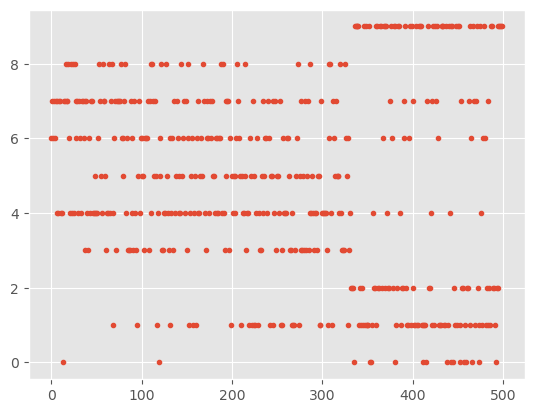

In [178]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


#### Top words in each cluster based on product description

In [180]:
# Define the number of clusters to be used
number_of_clusters = 10

# Setting up and fitting the KMeans model
kmeans_cluster_model = KMeans(n_clusters=number_of_clusters, init='k-means++', max_iter=100, n_init=1)
kmeans_cluster_model.fit(X1)

print("Primary terms in each cluster:")
# Ordering the centroids of the clusters and getting the feature names
centroid_order = kmeans_cluster_model.cluster_centers_.argsort()[:, ::-1]
feature_terms = vectorizer.get_feature_names_out()

# Looping through each cluster to print the top terms
for cluster_idx in range(number_of_clusters):
    print(f"Cluster {cluster_idx}:")
    for index in centroid_order[cluster_idx, :10]:
        print(f" {feature_terms[index]}")
    print()



Primary terms in each cluster:
Cluster 0:
 10
 mini
 adapter
 card
 usb
 wifi
 11
 dongle
 windows
 wireless

Cluster 1:
 cable
 usb
 type
 black
 hdmi
 feet
 male
 smartphone
 amazonbasics
 micro

Cluster 2:
 watch
 modes
 calling
 sports
 spo2
 bluetooth
 faces
 display
 smartwatch
 heart

Cluster 3:
 ram
 storage
 5g
 128gb
 battery
 6gb
 upto
 8gb
 4gb
 display

Cluster 4:
 remote
 tv
 control
 compatible
 led
 lcd
 box
 smart
 sony
 cover

Cluster 5:
 ready
 32
 80
 inches
 cm
 hd
 led
 tv
 smart
 black

Cluster 6:
 cm
 inches
 led
 4k
 tv
 smart
 hd
 series
 ultra
 android

Cluster 7:
 power
 protection
 polymer
 input
 output
 bank
 10000mah
 lithium
 li
 layer

Cluster 8:
 lightning
 cable
 ipad
 iphone
 nylon
 usb
 charging
 certified
 mfi
 braided

Cluster 9:
 type
 cable
 charging
 data
 usb
 fast
 sync
 3a
 480mbps
 micro

